Получаем гистограмму изображения

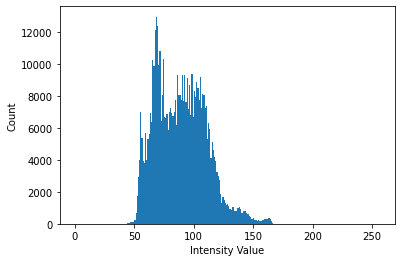

Коэффициент контраста: 126
Среднее значение: 88.70563504016064


In [171]:
from skimage import io
import matplotlib.pyplot as plt 
image = io.imread('test.jpg')
ax = plt.hist(image.ravel(), 256, [0, 256])
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.show()

print("Коэффициент контраста: {}".format(image.max() - image.min()))
print("Среднее значение: {}".format(image.mean()))

Зона

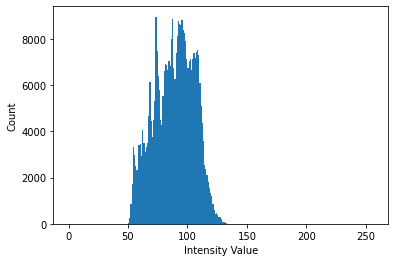

Коэффициент контраста: 
Среднее значение: 
133
49


In [177]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('zona.jpg')
ax = plt.hist(image.ravel(), 256, [0, 256])
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.show()

print("Коэффициент контраста: ".format(image.max() - image.min()))
print("Среднее значение: ".format(image.mean()))

print(image.max())
print(image.min())



Проводим эквилизацию гистограммы

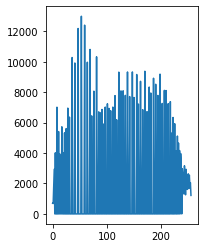

Коэффициент контраста: 
Среднее значение: 
255
0


In [173]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import io,data

wiki_img=cv2.imread('test.jpg')
wiki_gray=cv2.cvtColor(wiki_img,cv2.COLOR_BGR2GRAY)
wiki_equ=cv2.equalizeHist(wiki_gray)

hist=cv2.calcHist([wiki_gray],[0],None,[256],[0,256])
equ_hist=cv2.calcHist([wiki_equ],[0],None,[256],[0,256])
fig=plt.figure()
#ax1=fig.add_subplot(1,2,1)
#x = np.arange(0,256,0.001)
#y = np.sin(x/81)*13000
#y_masked = np.ma.masked_where(y < -0.5, y)
#ax1.plot(hist)
#ax1.plot(x,y_masked )
ax2=fig.add_subplot(1,2,2)
ax2.plot(equ_hist)
plt.show()

cv2.imwrite("equalized.png",wiki_equ )

print("Коэффициент контраста: ".format(wiki_equ.max() - wiki_equ.min()))
print("Среднее значение: ".format(wiki_equ.mean()))

print(wiki_equ.max())
print(wiki_equ.min())



Кусочно-линейное преобразование увеличения конраста

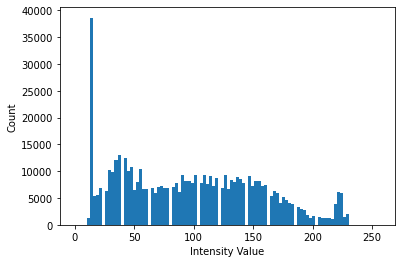

Коэффициент контраста: 
Среднее значение: 98.18235631921625
230
10


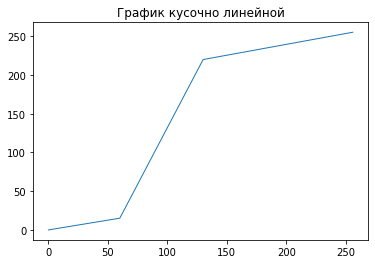

In [174]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("test.jpg", 0)

fStart = 60
fEnd = 130
fSout = 15
fEout = 220

fK1 = fSout / fStart

fK2 = (fEout - fSout) / (fEnd - fStart)
fC2 = fSout - fK2 * fStart

fK3 = (255.0 - fEout) / (255.0 - fEnd)
fC3 = 255.0 - fK3 * 255.0

h, w = img.shape[:2]
out = np.zeros(img.shape, np.uint8)
for i in range(h):
    for j in range(w):
        pix = img[i][j]

        if pix < fStart:
            out[i][j] = pix * fK1
        elif pix > fEnd:
            out[i][j] = pix * fK3 + fC3
        else:
            out[i][j] = pix * fK2 + fC2

                 # Преобразование типов данных
out = np.around(out)
out = out.astype(np.uint8)
# grayHist(img)
# grayHist(out)
_ = plt.hist(out.ravel(), 100, [0, 256] )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.show()
cv.imwrite("kusochnoe.png",out )

print("Коэффициент контраста: ".format(out.max() - out.min()))
print("Среднее значение: {}".format(out.mean()))

print(out.max())
print(out.min())

def gamma_plot():
     x = np.arange(0, 256, 0.01)
     y = []

     for i in range(len(x)):
        x_elem = x[i]

        if x_elem < fStart:
            y.append(x_elem * fK1)
        elif x_elem > fEnd:
            y.append(x_elem * fK3 + fC3)
        else:
            y.append(x_elem * fK2 + fC2)

     plt.plot(x, y, linewidth=1)
     plt.title(u'График кусочно линейной')
     plt.show()

gamma_plot()

Делаем степенное преобразование

Коэффициент контраста: 255
Среднее значение: 109.13790578982596
255
0


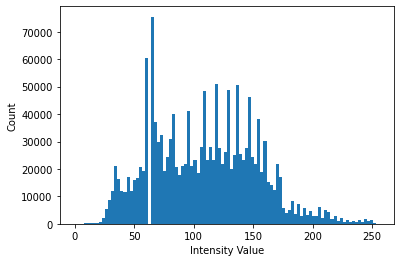

In [175]:
import math
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

# # Преобразование степенного закона φ> 1
# Преобразование степенного закона, φ <1
image = cv2.imread('test.jpg')
gamma_img2 = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        gamma_img2[i, j, 0] = math.pow(image[i, j, 0], 0.6)
        gamma_img2[i, j, 1] = math.pow(image[i, j, 1], 0.6)
        gamma_img2[i, j, 2] = math.pow(image[i, j, 2], 0.6)
cv2.normalize(gamma_img2, gamma_img2, 0, 255, cv2.NORM_MINMAX)
gamma_img2 = cv2.convertScaleAbs(gamma_img2)
cv2.imwrite("stepennoe_2.png",gamma_img2 )
_ = plt.hist(gamma_img2.ravel(), 100, [0, 256] )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')

print("Коэффициент контраста: {}".format(gamma_img2.max() - gamma_img2.min()))
print("Среднее значение: {}".format(gamma_img2.mean()))

print(gamma_img2.max())
print(gamma_img2.min())

Нормализация Гистограммы

42.0
168.0
255
0


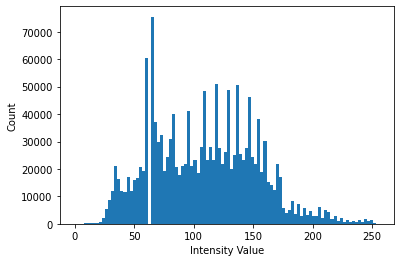

In [176]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("test.jpg", 0)
 # Рассчитать минимальный уровень серого и максимальный уровень серого, отображаемые в исходном изображении
 # Используйте функцию расчета
Imin, Imax = cv.minMaxLoc(img)[:2]

print(Imin)
print(Imax)
 # Использовать числовой расчет
# Imax = np.max(img)
# Imin = np.min(img)
Omin, Omax = 0, 255
 # Рассчитать значения a и b
a = float(Omax - Omin) / (Imax - Imin)
b = Omin - a * Imin
out = a * img + b
out = out.astype(np.uint8)

print(out.max())
print(out.min())


cv.imwrite("normilized.png",out)
_ = plt.hist(gamma_img2.ravel(), 100, [0, 256] )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')

